##Configuration variables

In [1]:
root = '/content/drive/My Drive/nlp-lab'
datasets_location = root + '/data/original-datasets/annotated-organic-dataset'
processed_data_location = root + '/data/processed-data/organic'

## Imports

In [ ]:
import nltk
nltk.download('punkt')
import pandas as pd
import gzip
import math
import numpy as np
from google.colab import drive
from sys import path
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Mount Drive

In [ ]:
drive.mount('/content/drive', force_remount=True)
path.append(root)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Dataset

In [ ]:
data_list = []
columns = {'Comment_number': 'comment_id', 'Sentence_number': 'sentence_id',
           'Sentiment': 'sentence_sentiment', 'Sentence': 'sentence_text'}
for split in ['train', 'validation']:
    df = pd.read_csv(f'{organic_dataset_location}/{split}/dataframe.csv',
                     index_col=None, header=0, sep='|')
    data_list.append(df)
    print(f'{split}: done')
data_df = pd.concat(data_list, axis=0, ignore_index=True)[columns.keys()]

data_df = data_df.dropna().rename(columns=columns)
number_of_tokens = lambda text: len(nltk.word_tokenize(text))
data_df['number_of_tokens'] = data_df['sentence_text'].apply(number_of_tokens)

train: done
validation: done


##Explore processed dataset

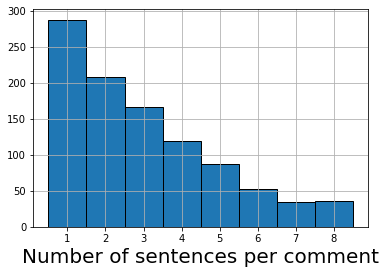

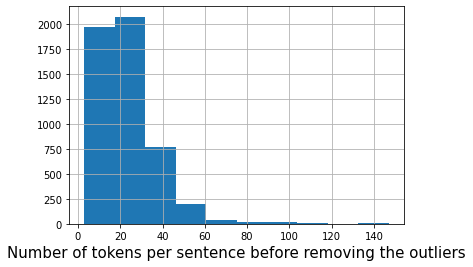

In [ ]:
#Number of sentences per comment
number_of_sentences_plot = data_df.groupby(['comment_id']).size().hist(bins=np.arange(0,9)+0.5, ec="k")
number_of_sentences_plot.set_xlabel("Number of sentences per comment",fontsize=20)
plt.show()

#Number of positive, negative and neutral sentiments in comments
ratings = data_df.groupby(['sentence_sentiment']).size()

#Number of tokens per sentence
tokens_per_sentence_plot = data_df["number_of_tokens"].hist() #Clearly, there are some outliers
tokens_per_sentence_plot.set_xlabel("Number of tokens per sentence before removing the outliers",fontsize=15)
plt.show()
#0.11419957517% of the dataset has more than 200 tokens
#0.1964232693of the dataset has more than 100 tokens


##Remove outliers and export data

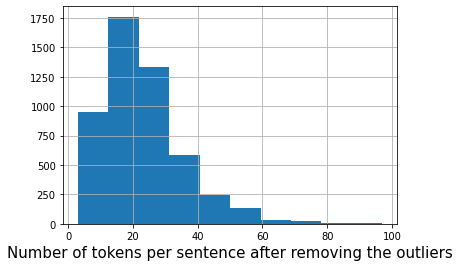

In [ ]:
data_df = data_df[data_df['number_of_tokens'].apply(lambda x: x < 100)]
tokens_per_sentence_plot2 = data_df["number_of_tokens"].hist()
tokens_per_sentence_plot2.set_xlabel("Number of tokens per sentence after removing the outliers",fontsize=15)
data_df.to_json(processed_data_location + '/processed_data_without_embeddings_no_outliers.json')